In [699]:
"""
based on:
https://stackoverflow.com/a/451580/6631639
https://kanoki.org/2017/07/12/merge-images-with-python/
https://stackoverflow.com/a/16377244/6631639
https://stackoverflow.com/a/41887497/6631639

Code by: https://gigabaseorgigabyte.wordpress.com/2017/11/08/resizing-and-combining-multiple-png-images/
and Emily Olafson
"""

import numpy as np
from PIL import Image, ImageFont, ImageDraw
import os

def make_black_white(picture):
    # Get the size of the image
    width, height = picture.size

    # Process every pixel
    for x in range(0,width):
        for y in range(0,height):
            current_color = picture.getpixel((x,y))
            if current_color ==(0,0,0):
                picture.putpixel( (x,y), (255,255,255))

    return picture

def make_white_black(picture):
    # Get the size of the image
    width, height = picture.size

    # Process every pixel
    for x in range(0,width):
        for y in range(0,height):
            current_color = picture.getpixel((x,y))
            if current_color ==(255,255,255):
                picture.putpixel( (x,y), (0,0,0))

    return picture
def change_height_proportionally(img, width):
    """Change height of image proportional to given width."""
    wpercent = width / img.size[0]
    proportional_height = int(img.size[1] * wpercent)
    return img.resize((width, proportional_height), Image.ANTIALIAS)


def change_width_proportionally(img, height):
    """Change width of image proportional to given height."""
    hpercent = height / img.size[1]
    proportional_width = int(img.size[0] * hpercent)
    return img.resize((proportional_width, height), Image.ANTIALIAS)


def make_same_width(image_list):
    """Make all images in input list the same width."""
    imgs = [i for i in image_list]
    min_width = min([i.size[0] for i in imgs])
    resized = [change_height_proportionally(img, min_width) for img in imgs]
    return [np.asarray(i) for i in resized]


def make_same_height(image_list):
    """Make all images in input list the same height."""
    imgs = [i for i in image_list]
    min_height = min([i.size[1] for i in imgs])
    resized = [change_width_proportionally(img, min_height) for img in imgs]
    return [np.asarray(i) for i in resized]


def add_text(img):
    """Add text annotation to hardcoded locations."""
    font = ImageFont.truetype(
        "/usr/share/fonts/truetype/freefont/FreeMonoBold.ttf",
        size=24,
        encoding="unic")
    draw = ImageDraw.Draw(img)
    draw.text((30, 30), "A", (0, 0, 0), font=font)
    draw.text((30, 490), "B", (0, 0, 0), font=font)
    draw.text((30, 950), "C", (0, 0, 0), font=font)
    draw.text((30, 1430), "D", (0, 0, 0), font=font)
    draw.text((510, 30), "E", (0, 0, 0), font=font)
    draw.text((510, 950), "F", (0, 0, 0), font=font)
    
def add_whitespace_between_horiz(image_list, width):
    #eo
    # adds whitespace horizontally two or more figures. builds first->last left->right
    whitespace = np.ones([10000,width,3],dtype=np.uint8)*255
    whitespace = Image.fromarray(whitespace)
    for i in range(0, len(image_list)):
        if i==0:
            imgleft = image_list[i]
            continue
        imgright = image_list[i]
        imgrightwhite = Image.fromarray(np.hstack(make_same_height([whitespace, imgright])))
        imgleft = Image.fromarray(np.hstack(make_same_height([imgleft,imgrightwhite])))
        
    return imgleft
    
def add_whitespace_between_vert(image_list, height):
    #eo
    # adds whitespace vertically between two or more figures. builds first->last top->down
    whitespace = np.ones([height,10000,3],dtype=np.uint8)*255
    whitespace = Image.fromarray(whitespace)
    for i in range(0, len(image_list)):
        if i==0:
            imgtop = image_list[i]
            continue
        imgbottom = image_list[i]
        imgbottomwhite = Image.fromarray(np.vstack(make_same_width([whitespace, imgbottom])))
        imgtop = Image.fromarray(np.vstack(make_same_width([imgtop,imgbottomwhite])))
        
    return imgtop

def add_blackspace_between_vert(image_list, height):
    #eo
    # adds whitespace vertically between two or more figures. builds first->last top->down
    whitespace = np.ones([height,10000,3],dtype=np.uint8)*0
    whitespace = Image.fromarray(whitespace)
    for i in range(0, len(image_list)):
        if i==0:
            imgtop = image_list[i]
            continue
        imgbottom = image_list[i]
        imgbottomwhite = Image.fromarray(np.vstack(make_same_width([whitespace, imgbottom])))
        imgtop = Image.fromarray(np.vstack(make_same_width([imgtop,imgbottomwhite])))
        
    return imgtop

def add_blackspace_between_horiz(image_list, width):
    #eo
    # adds whitespace horizontally two or more figures. builds first->last left->right
    whitespace = np.ones([10000,width,3],dtype=np.uint8)*0
    whitespace = Image.fromarray(whitespace)
    for i in range(0, len(image_list)):
        if i==0:
            imgleft = image_list[i]
            continue
        imgright = image_list[i]
        imgrightwhite = Image.fromarray(np.hstack(make_same_height([whitespace, imgright])))
        imgleft = Image.fromarray(np.hstack(make_same_height([imgleft,imgrightwhite])))
        
    return imgleft


def crop_dorsal(image1):
    # Cropped image of above dimension
    # (It will not change original image)
    im1 = image1.crop((3300, 0, 3900, 1300))
    im2 = image1.crop((6100, 0, 6700, 1300))

    return Image.fromarray(np.hstack([im1, im2]))
    
def crop_medial_lateral(image2):
    print('cropping medial/lateral')
    im1 = image2.crop((230, 0, 580, 250))
    im2 = image2.crop((730, 0, 1070, 250))

    return Image.fromarray(np.hstack([im1, im2]))


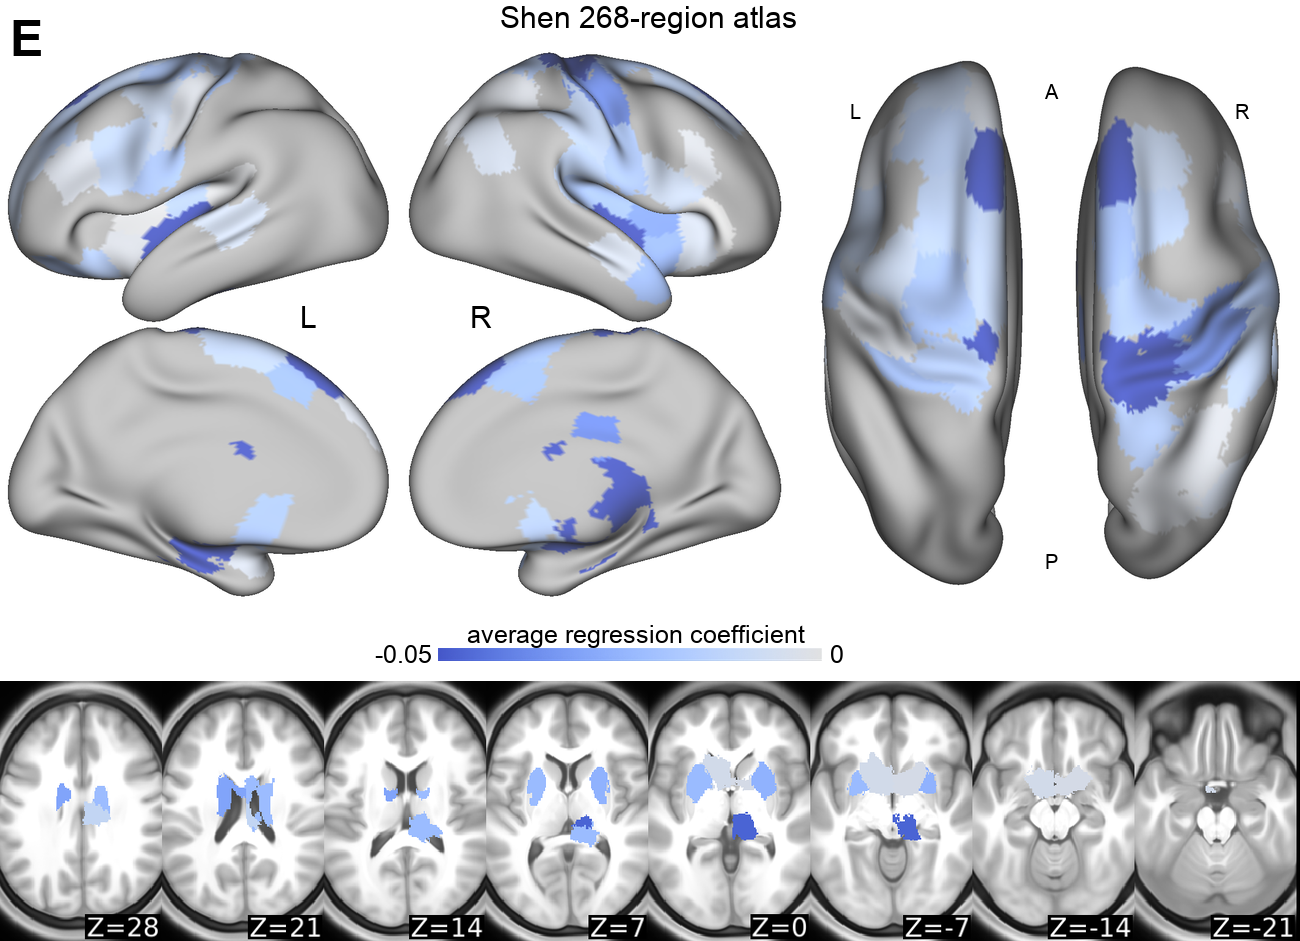

In [724]:
# shen
image1 = make_black_white(crop_dorsal(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_dorsalsurfaces_betas_fig.png')))
image2 = make_black_white(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_surfaces_betas_fig.png'))
sub = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_subcortical_betas_fig.png')

colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar_transparent.png').convert('RGB')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')


brains = Image.fromarray(np.hstack(make_same_height([image2, image1])))

#brains = add_blackspace_between_vert([brains, colorbar], 10)

shen268 = Image.fromarray(np.vstack(make_same_width([whitefiller,brains])))
draw = ImageDraw.Draw(shen268)

textcolor=(0,0,0)
draw.text((500, 0), "Shen 268-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 30))
draw.text((300, 300), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 30))
draw.text((470, 300), 'R', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 30))
draw.text((850, 100), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 20))
draw.text((1235, 100), 'R',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 20))
draw.text((1045, 80), 'A', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 20))
draw.text((1045, 550), 'P',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 20))


shen268=add_whitespace_between_vert([shen268, colorbar],250)
draw = ImageDraw.Draw(shen268)

draw.text((467, 620), 'average regression coefficient', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 25))
draw.text((375, 640), '-0.05', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 25))
draw.text((830, 640), '0', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 25))
draw.text((10, 10), 'E', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 50))


shen268 = Image.fromarray(np.vstack(make_same_width([shen268, sub])))
shen268


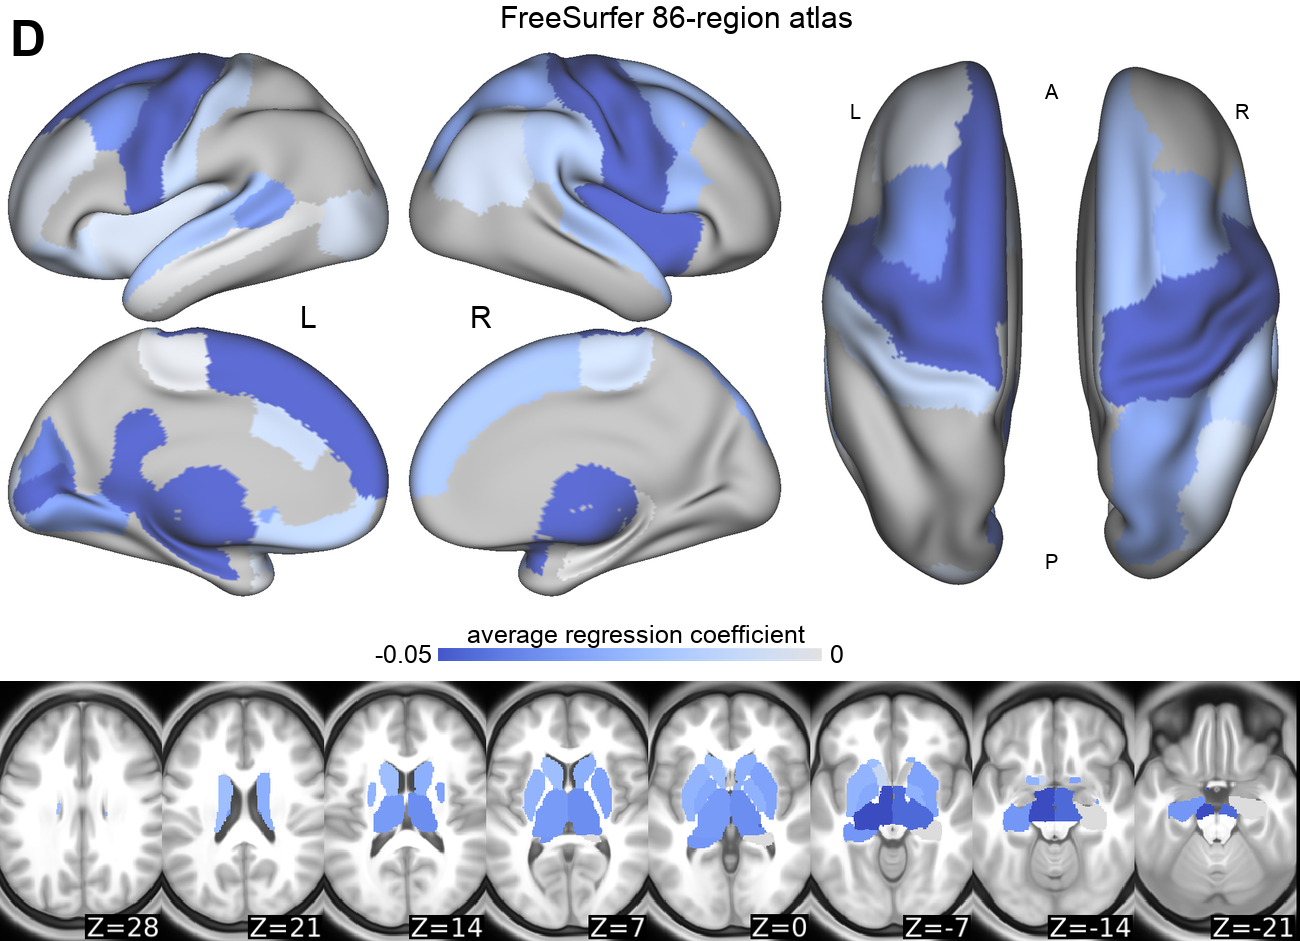

In [725]:
# fs86
image1 = make_black_white(crop_dorsal(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_dorsalsurfaces_betas_fig.png')))
image2 = make_black_white(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_surfaces_betas_fig.png'))
sub = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_subcortical_betas_fig.png')

colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar_transparent.png').convert('RGB')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')


brains = Image.fromarray(np.hstack(make_same_height([image2, image1])))

#brains = add_blackspace_between_vert([brains, colorbar], 10)

fs86 = Image.fromarray(np.vstack(make_same_width([whitefiller,brains])))
draw = ImageDraw.Draw(fs86)

textcolor=(0,0,0)
draw.text((500, 0), "FreeSurfer 86-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 30))
draw.text((300, 300), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 30))
draw.text((470, 300), 'R', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 30))
draw.text((850, 100), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 20))
draw.text((1235, 100), 'R',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 20))
draw.text((1045, 80), 'A', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 20))
draw.text((1045, 550), 'P',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 20))


fs86=add_whitespace_between_vert([fs86, colorbar],250)
draw = ImageDraw.Draw(fs86)

draw.text((467, 620), 'average regression coefficient', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 25))
draw.text((375, 640), '-0.05', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 25))
draw.text((830, 640), '0', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 25))
draw.text((10, 10), 'D', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 50))

fs86 = Image.fromarray(np.vstack(make_same_width([fs86, sub])))
fs86


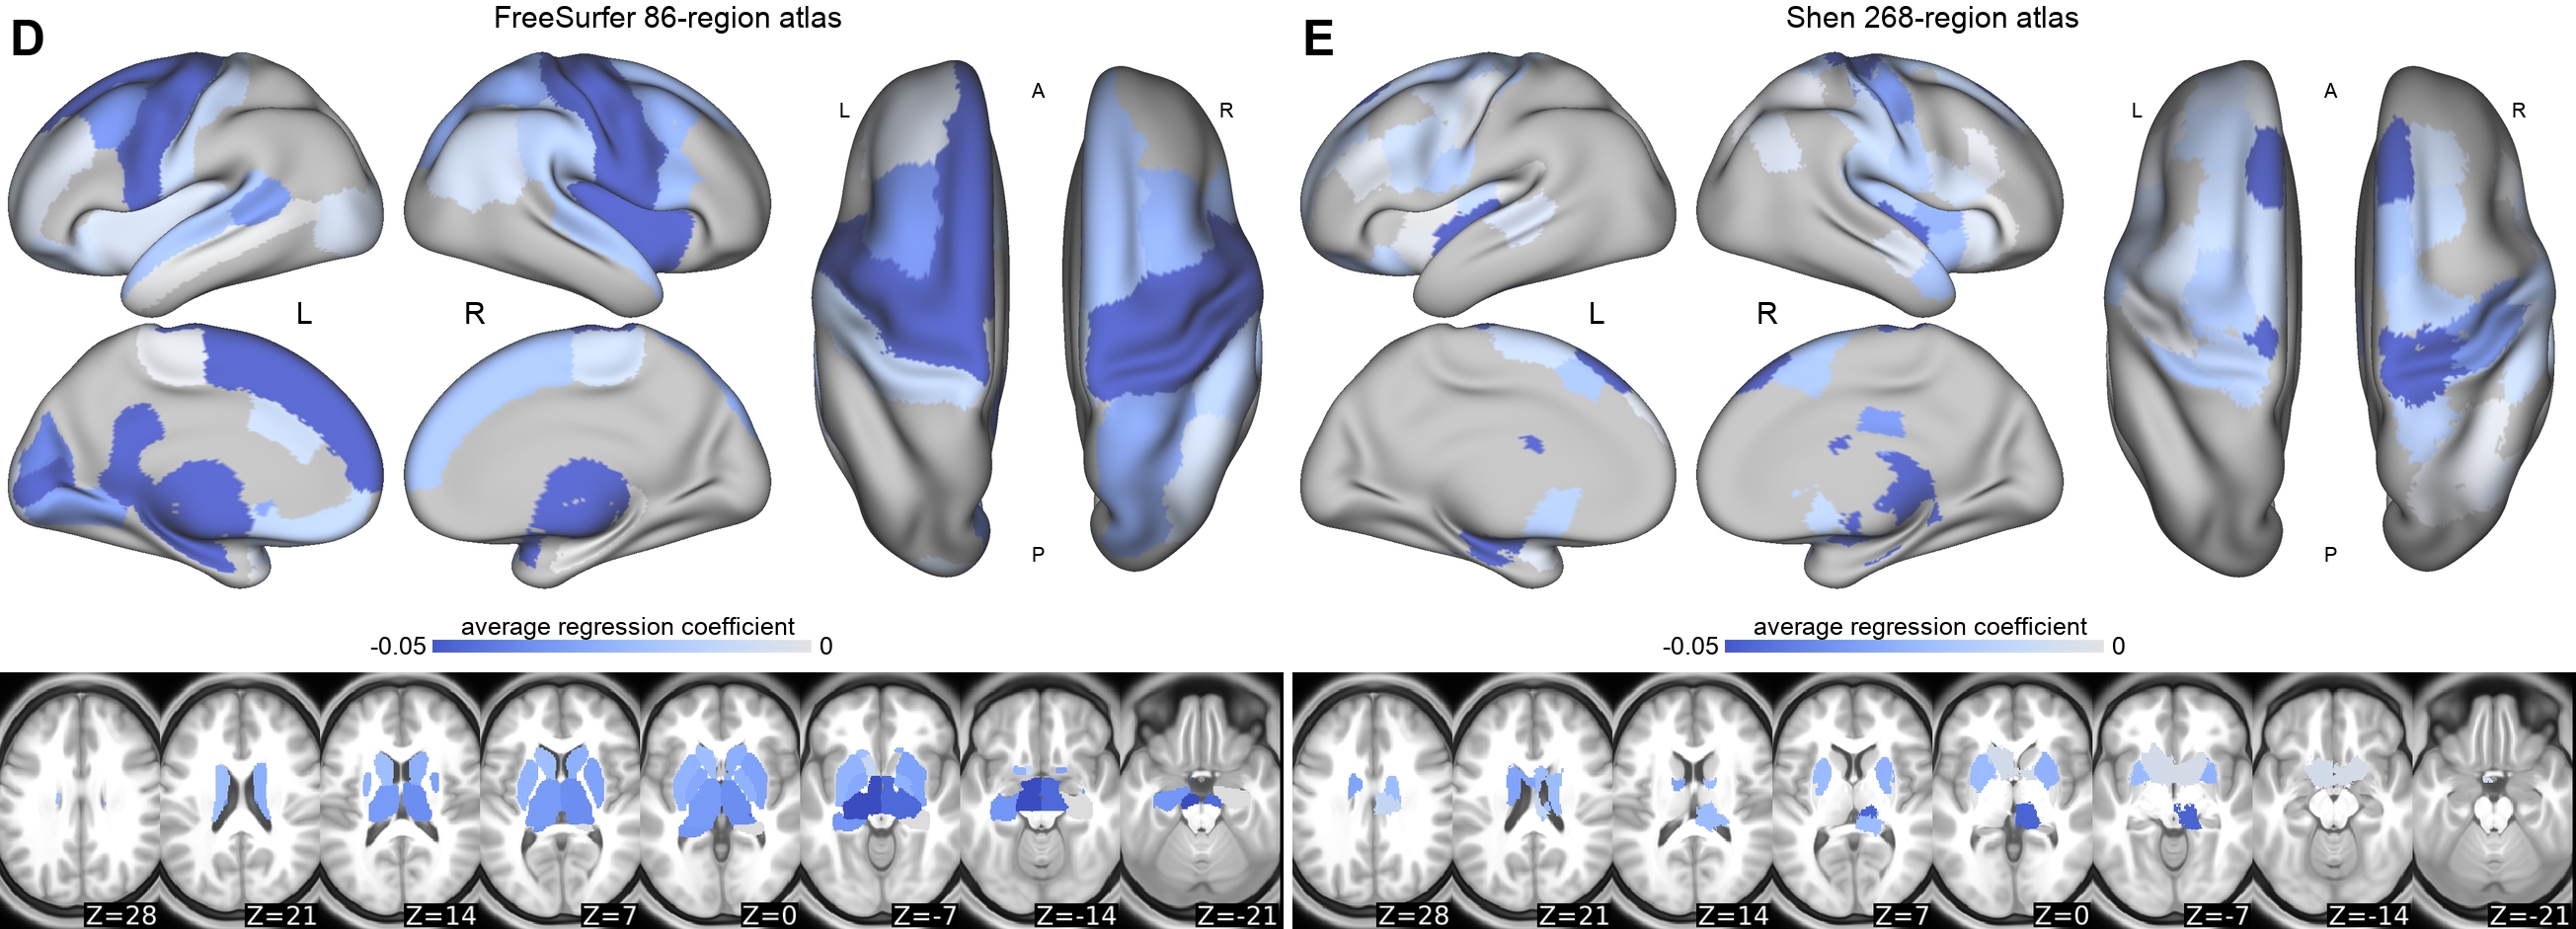

In [726]:
brains = add_whitespace_between_horiz([fs86, shen268], 100)
brains

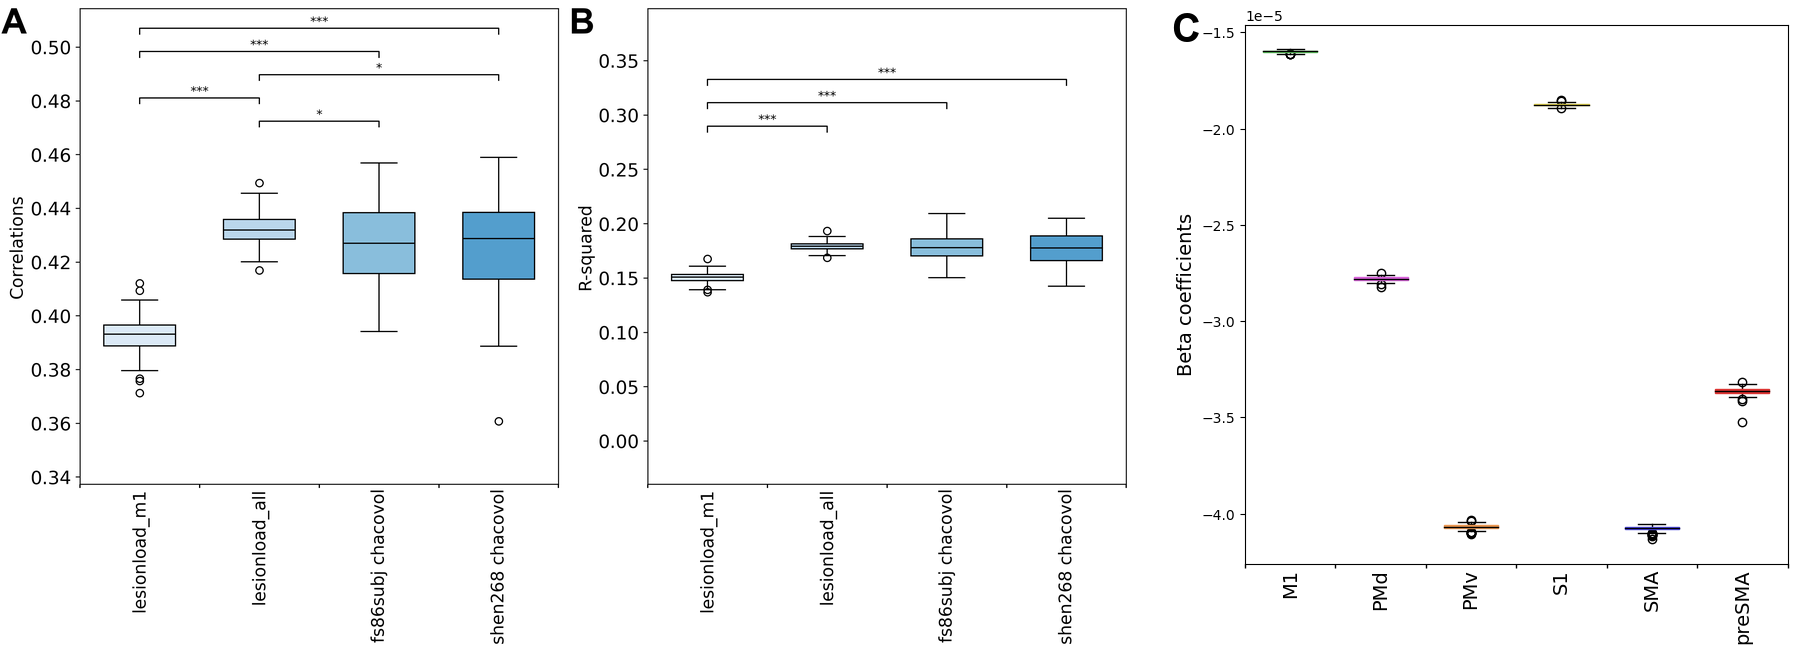

In [729]:
smatt_beta = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_7_smatt_betas.png').convert('RGB')
draw = ImageDraw.Draw(smatt_beta)
draw.text((5, 5), 'C', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 40))


corrs = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_10_boxplots_correlations.png').convert('RGB')
draw = ImageDraw.Draw(corrs)
draw.text((5, 5), 'A', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 120))


r2 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_10_boxplots_rsquared.png').convert('RGB')
draw = ImageDraw.Draw(r2)
draw.text((5, 5), 'B', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 120))


bottom_plots = add_whitespace_between_horiz([corrs, r2],10)


bottom_plots = add_whitespace_between_horiz([bottom_plots, smatt_beta],500)
bottom_plots


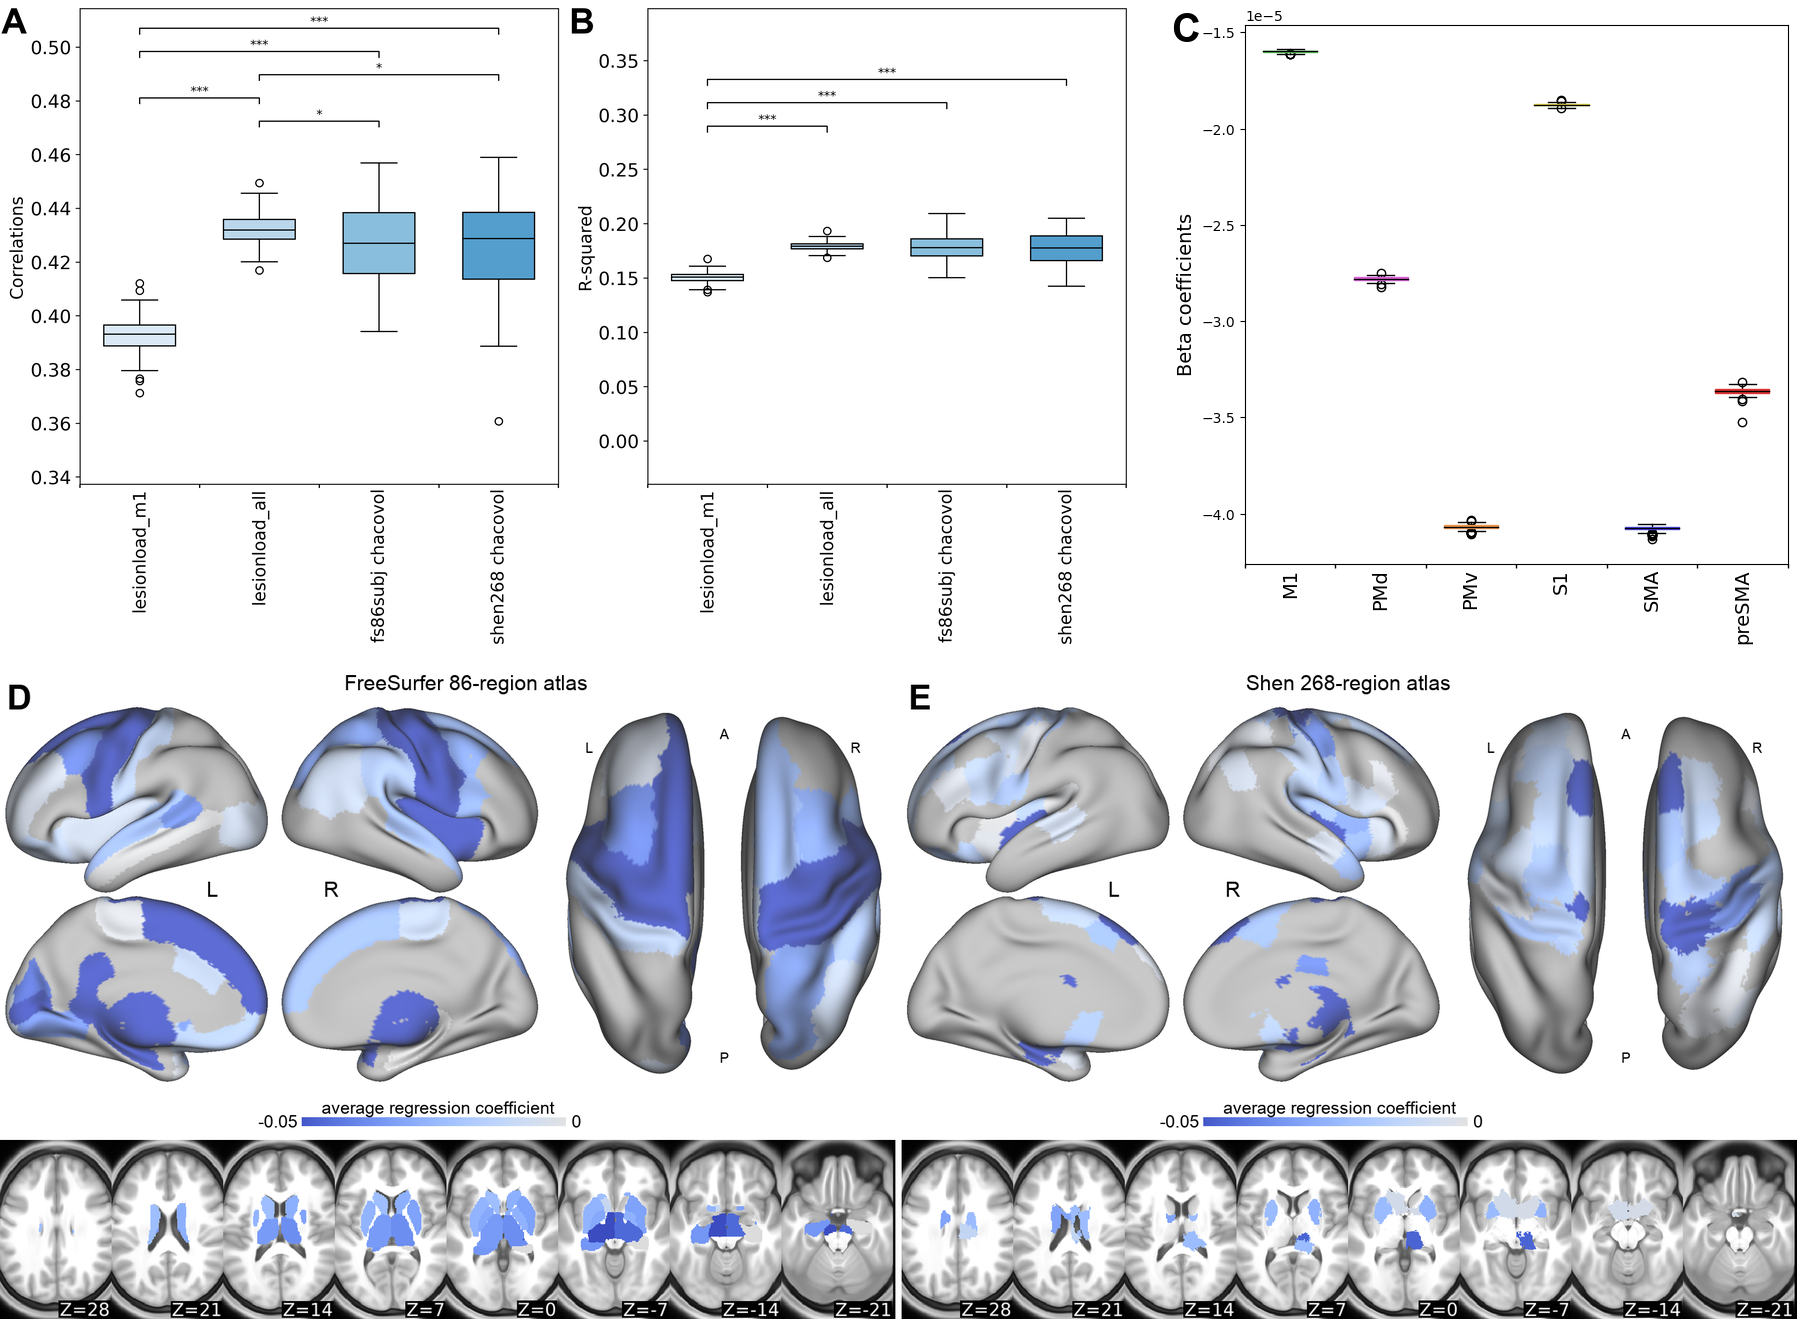

In [734]:
finalimage = add_whitespace_between_vert([bottom_plots, brains], 100)
finalimage.save('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/Analysis1.png')
finalimage

In [857]:
awspath = "ec2-3-238-206-219.compute-1.amazonaws.com"

command1 = 'scp -r {}:/home/ubuntu/enigma/results/analysis_2/analysis*boxplots* /Users/emilyolafson/GIT/ENIGMA-manuscript/figures/'.format(awspath)
command2 = 'scp -r {}:/home/ubuntu/enigma/results/analysis_2/analysis*smatt* /Users/emilyolafson/GIT/ENIGMA-manuscript/figures/'.format(awspath)
command3 = 'scp -r {}:/home/ubuntu/enigma/results/analysis_2/*_betas_fig.png /Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/.'.format(awspath)

os.system(command1)
os.system(command2)
os.system('setopt +o nomatch')
os.system(command3)


0

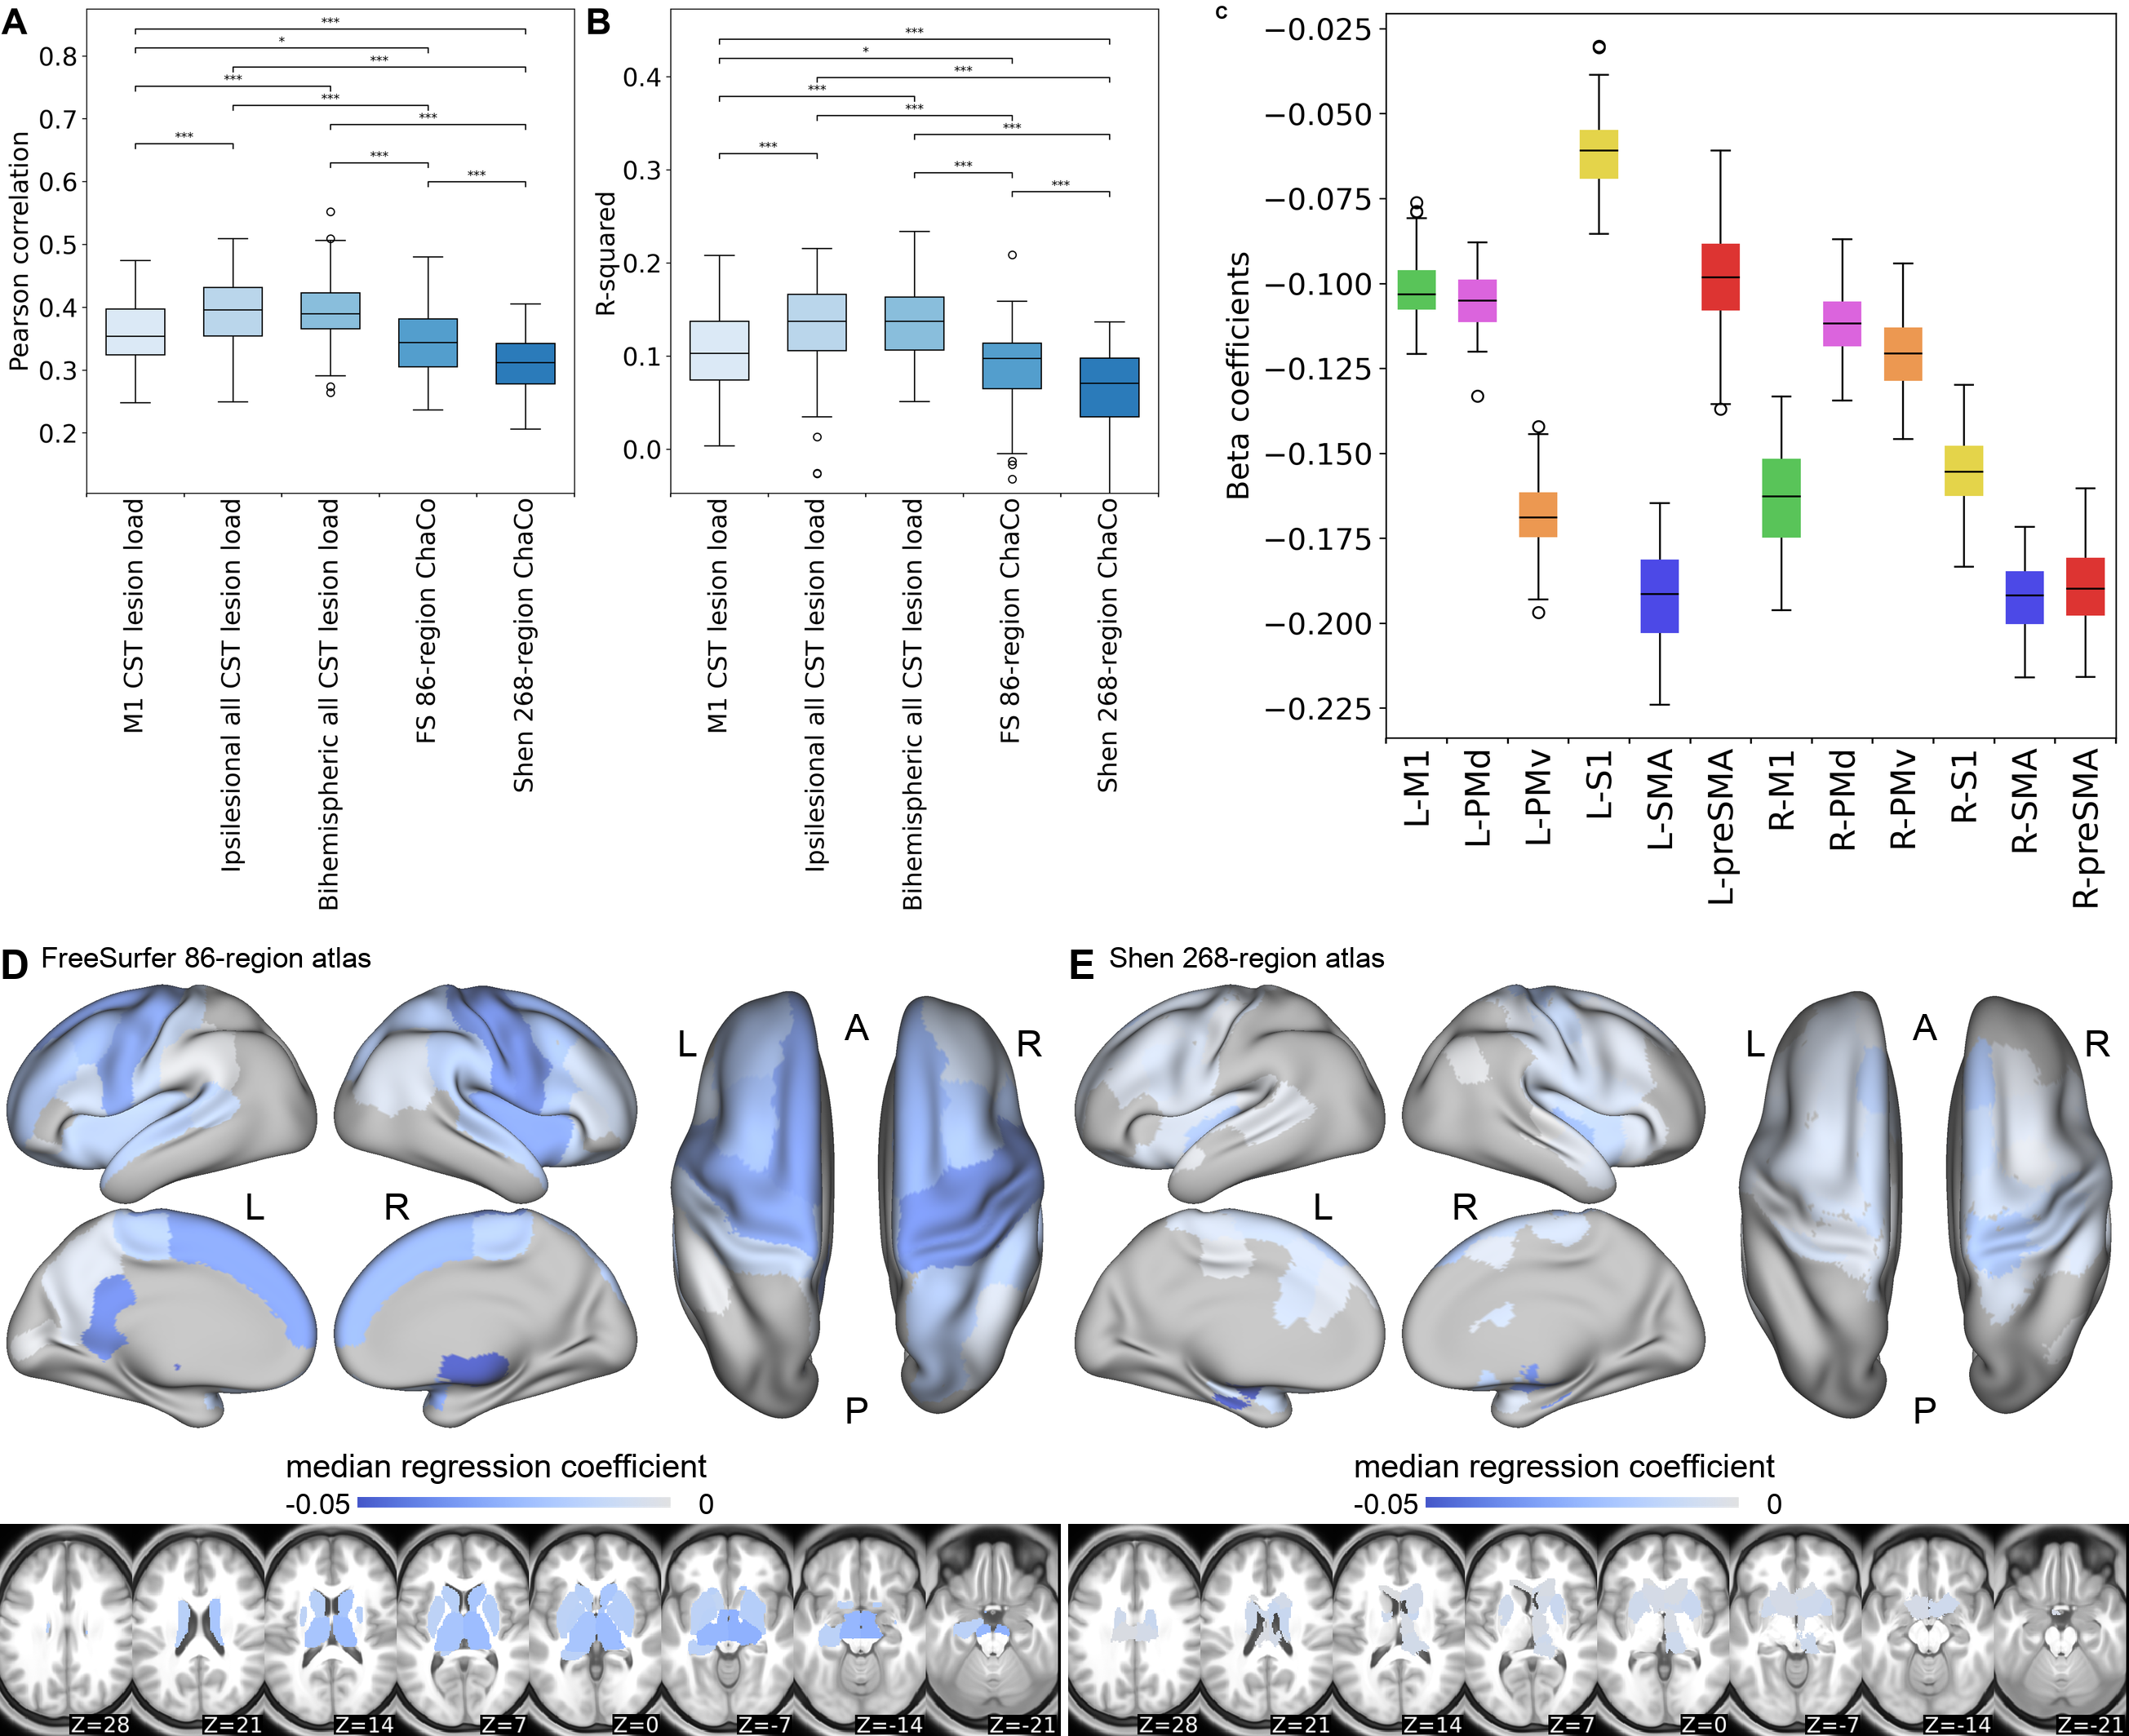

In [859]:
# shen
image1 = make_black_white(crop_dorsal(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval5_meanbetas_allperms_50_dorsalsurfaces_betas_fig.png')))
image2 = make_black_white(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval5_meanbetas_allperms_50_surfaces_betas_fig.png'))
sub = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval5_meanbetas_allperms_50_subcortical_betas_fig.png')

colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar_transparent.png').convert('RGB')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')


brains = Image.fromarray(np.hstack(make_same_height([image2, image1])))

#brains = add_blackspace_between_vert([brains, colorbar], 10)

shen268 = Image.fromarray(np.vstack(make_same_width([whitefiller,brains])))
draw = ImageDraw.Draw(shen268)

textcolor=(0,0,0)
draw.text((50, 0), "Shen 268-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((300, 300), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((470, 300), 'R', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((830, 100), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1245, 100), 'R',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 80), 'A', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 550), 'P',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))


shen268=add_whitespace_between_vert([shen268, colorbar],500)
draw = ImageDraw.Draw(shen268)

draw.text((350, 620), 'median regression coefficient', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 40))
draw.text((350, 670), '-0.05', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((856, 670), '0', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((0, 0), 'E', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 50))


shen268 = Image.fromarray(np.vstack(make_same_width([shen268, sub])))


# fs86
image1 = make_black_white(crop_dorsal(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval5_meanbetas_allperms_50_dorsalsurfaces_betas_fig.png')))
image2 = make_black_white(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval5_meanbetas_allperms_50_surfaces_betas_fig.png'))
sub = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval5_meanbetas_allperms_50_subcortical_betas_fig.png')

colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar_transparent.png').convert('RGB')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')


brains = Image.fromarray(np.hstack(make_same_height([image2, image1])))

#brains = add_blackspace_between_vert([brains, colorbar], 10)

fs86 = Image.fromarray(np.vstack(make_same_width([whitefiller,brains])))
draw = ImageDraw.Draw(fs86)

textcolor=(0,0,0)
draw.text((50, 0), "FreeSurfer 86-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((300, 300), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((470, 300), 'R', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((830, 100), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1245, 100), 'R',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 80), 'A', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 550), 'P',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))


fs86=add_whitespace_between_vert([fs86, colorbar],500)
draw = ImageDraw.Draw(fs86)

draw.text((350, 620), 'median regression coefficient', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 40))
draw.text((350, 670), '-0.05', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((856, 670), '0', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((0, 0), 'D', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 50))

fs86 = Image.fromarray(np.vstack(make_same_width([fs86, sub])))
fs86
brains = add_whitespace_between_horiz([fs86, shen268], 100)
brains
smatt_beta = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_2_lesionload_all_2h_smatt_betas.png').convert('RGB')
draw = ImageDraw.Draw(smatt_beta)
draw.text((5, 5), 'C', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 40))


corrs = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_2_boxplots_correlations.png').convert('RGB')
draw = ImageDraw.Draw(corrs)
draw.text((5, 5), 'A', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 120))


r2 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_2_boxplots_rsquared.png').convert('RGB')
draw = ImageDraw.Draw(r2)
draw.text((5, 5), 'B', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 120))


bottom_plots = add_whitespace_between_horiz([corrs, r2],10)


bottom_plots = add_whitespace_between_horiz([bottom_plots, smatt_beta],500)
bottom_plots


finalimage = add_whitespace_between_vert([bottom_plots, brains], 100)
finalimage.save('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/Analysis2.png')
finalimage


In [851]:
awspath = "ec2-3-238-206-219.compute-1.amazonaws.com"

command1 = 'scp -r {}:/home/ubuntu/enigma/results/analysis_1/analysis*boxplots* /Users/emilyolafson/GIT/ENIGMA-manuscript/figures/'.format(awspath)
command2 = 'scp -r {}:/home/ubuntu/enigma/results/analysis_1/analysis*smatt* /Users/emilyolafson/GIT/ENIGMA-manuscript/figures/'.format(awspath)
command3 = 'scp -r {}:/home/ubuntu/enigma/results/analysis_1/*_betas_fig.png /Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/.'.format(awspath)

os.system(command1)
os.system(command2)
os.system('setopt +o nomatch')
os.system(command3)


0

In [816]:
command3

'scp -r ec2-3-238-206-219.compute-1.amazonaws.com:/home/ubuntu/enigma/results/analysis_1/*_betas_fig.png /Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/.'

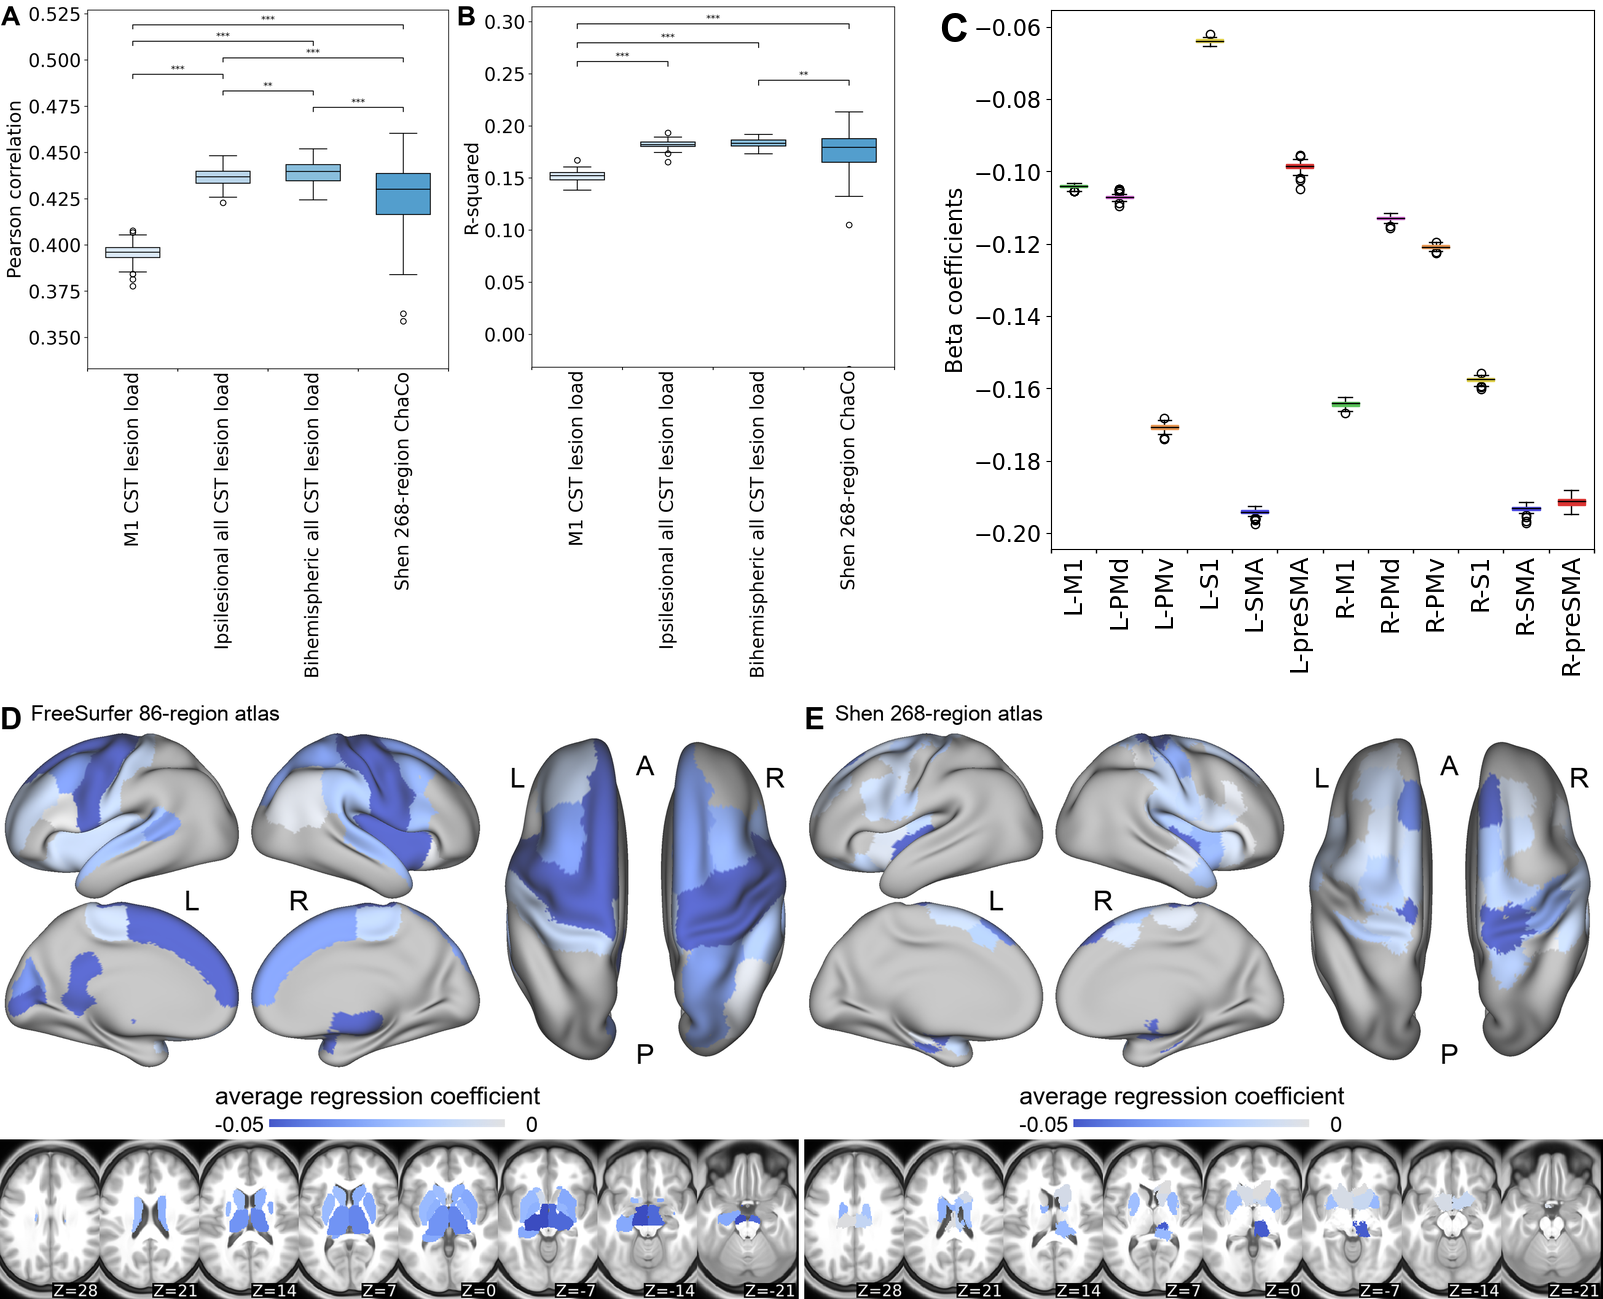

In [852]:
# shen
image1 = make_black_white(crop_dorsal(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_dorsalsurfaces_betas_fig.png')))
image2 = make_black_white(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_surfaces_betas_fig.png'))
sub = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_subcortical_betas_fig.png')

colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar_transparent.png').convert('RGB')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')


brains = Image.fromarray(np.hstack(make_same_height([image2, image1])))

#brains = add_blackspace_between_vert([brains, colorbar], 10)

shen268 = Image.fromarray(np.vstack(make_same_width([whitefiller,brains])))
draw = ImageDraw.Draw(shen268)

textcolor=(0,0,0)
draw.text((50, 0), "Shen 268-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((300, 300), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((470, 300), 'R', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((830, 100), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1245, 100), 'R',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 80), 'A', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 550), 'P',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))


shen268=add_whitespace_between_vert([shen268, colorbar],500)
draw = ImageDraw.Draw(shen268)

draw.text((350, 620), 'median regression coefficient', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 40))
draw.text((350, 670), '-0.05', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((856, 670), '0', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((0, 0), 'E', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 50))


shen268 = Image.fromarray(np.vstack(make_same_width([shen268, sub])))


# fs86
image1 = make_black_white(crop_dorsal(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_dorsalsurfaces_betas_fig.png')))
image2 = make_black_white(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_surfaces_betas_fig.png'))
sub = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_chronic_ridge_crossval1_meanbetas_allperms_50_subcortical_betas_fig.png')

colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar_transparent.png').convert('RGB')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')


brains = Image.fromarray(np.hstack(make_same_height([image2, image1])))

#brains = add_blackspace_between_vert([brains, colorbar], 10)

fs86 = Image.fromarray(np.vstack(make_same_width([whitefiller,brains])))
draw = ImageDraw.Draw(fs86)

textcolor=(0,0,0)
draw.text((50, 0), "FreeSurfer 86-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((300, 300), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((470, 300), 'R', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((830, 100), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1245, 100), 'R',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 80), 'A', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 550), 'P',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))


fs86=add_whitespace_between_vert([fs86, colorbar],500)
draw = ImageDraw.Draw(fs86)

draw.text((350, 620), 'median regression coefficient', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 40))
draw.text((350, 670), '-0.05', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((856, 670), '0', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((0, 0), 'D', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 50))

fs86 = Image.fromarray(np.vstack(make_same_width([fs86, sub])))
fs86
brains = add_whitespace_between_horiz([fs86, shen268], 100)
brains
smatt_beta = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_1_lesionload_all_2h_smatt_betas.png').convert('RGB')
draw = ImageDraw.Draw(smatt_beta)
draw.text((5, 5), 'C', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 40))


corrs = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_1_boxplots_correlations.png').convert('RGB')
draw = ImageDraw.Draw(corrs)
draw.text((5, 5), 'A', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 120))


r2 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_1_boxplots_rsquared.png').convert('RGB')
draw = ImageDraw.Draw(r2)
draw.text((5, 5), 'B', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 120))


bottom_plots = add_whitespace_between_horiz([corrs, r2],10)


bottom_plots = add_whitespace_between_horiz([bottom_plots, smatt_beta],500)
bottom_plots


finalimage = add_whitespace_between_vert([bottom_plots, brains], 100)
finalimage.save('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/Analysis1.png')
finalimage


In [847]:
# main findings

- m1 cst lesion load alone has significantly worse performance on out-of-sample and out-of-distribution data compared to ROIs beyond the primary motor system
- data-driven feature selection generally aligns with expanded corticospinal tract template
- asymmetry in terms of which regions predict impairment
- *insert ensemble result*
- model parameters are available on the repository. 


# limitations
- crude measure of motor impairment
- although it was not our goal to optimize out of sample prediction, baseline motor scores would likely improve predictions
- 

0
2
1
3
2
4
3
10
4
21
5
56


In [848]:
nodes

array([ 2,  3,  4, 10, 21, 56])

In [ ]:
# ANALYSIS "12" - train on acute, predict on chronic

awspath = "ec2-3-238-206-219.compute-1.amazonaws.com"

command1 = 'scp -r {}:/home/ubuntu/enigma/results/analysis_12/analysis*boxplots* /Users/emilyolafson/GIT/ENIGMA-manuscript/figures/'.format(awspath)
command2 = 'scp -r {}:/home/ubuntu/enigma/results/analysis_12/analysis*smatt* /Users/emilyolafson/GIT/ENIGMA-manuscript/figures/'.format(awspath)
#command3 = 'scp -r {}:/home/ubuntu/enigma/results/analysis_12/*_betas_fig.png /Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/.'.format(awspath)

os.system(command1)
os.system(command2)
os.system('setopt +o nomatch')
os.system(command3)


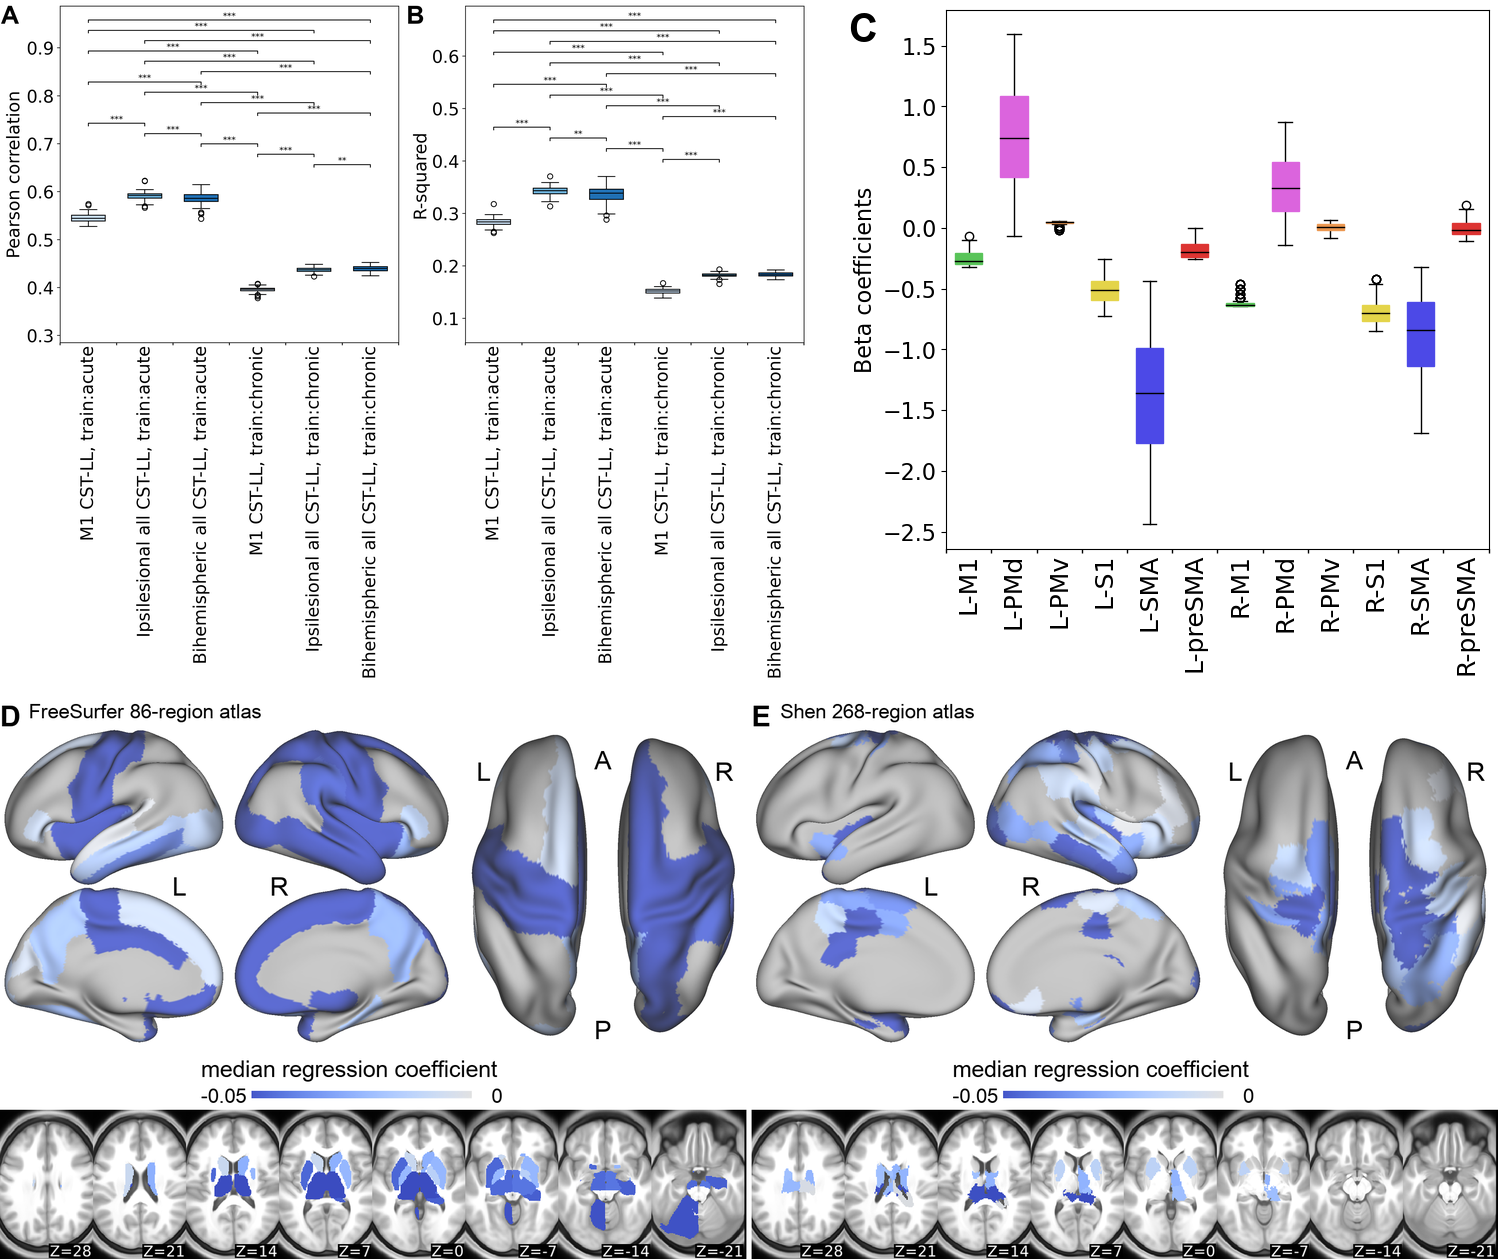

In [905]:
crossvaltype = '1'
chronicity = 'acute'

# shen
image1 = make_black_white(crop_dorsal(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_{}_ridge_crossval{}_meanbetas_allperms_50_dorsalsurfaces_betas_fig.png'.format(chronicity, crossvaltype))))
image2 = make_black_white(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_{}_ridge_crossval{}_meanbetas_allperms_50_surfaces_betas_fig.png'.format(chronicity, crossvaltype)))
sub = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/shen268_normed_motor_scores_chacovol_{}_ridge_crossval{}_meanbetas_allperms_50_subcortical_betas_fig.png'.format(chronicity, crossvaltype))

colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar_transparent.png').convert('RGB')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')


brains = Image.fromarray(np.hstack(make_same_height([image2, image1])))

#brains = add_blackspace_between_vert([brains, colorbar], 10)

shen268 = Image.fromarray(np.vstack(make_same_width([whitefiller,brains])))
draw = ImageDraw.Draw(shen268)

textcolor=(0,0,0)
draw.text((50, 0), "Shen 268-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((300, 300), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((470, 300), 'R', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((830, 100), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1245, 100), 'R',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 80), 'A', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 550), 'P',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))


shen268=add_whitespace_between_vert([shen268, colorbar],500)
draw = ImageDraw.Draw(shen268)

draw.text((350, 620), 'median regression coefficient', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 40))
draw.text((350, 670), '-0.05', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((856, 670), '0', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((0, 0), 'E', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 50))


shen268 = Image.fromarray(np.vstack(make_same_width([shen268, sub])))


# fs86
image1 = make_black_white(crop_dorsal(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_{}_ridge_crossval{}_meanbetas_allperms_50_dorsalsurfaces_betas_fig.png'.format(chronicity, crossvaltype))))
image2 = make_black_white(Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_{}_ridge_crossval{}_meanbetas_allperms_50_surfaces_betas_fig.png'.format(chronicity, crossvaltype)))
sub = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/from_aws/fs86subj_normed_motor_scores_chacovol_{}_ridge_crossval{}_meanbetas_allperms_50_subcortical_betas_fig.png'.format(chronicity, crossvaltype))

colorbar=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/colorbar_transparent.png').convert('RGB')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')
whitefiller=Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/whitehoriz.png')


brains = Image.fromarray(np.hstack(make_same_height([image2, image1])))

#brains = add_blackspace_between_vert([brains, colorbar], 10)

fs86 = Image.fromarray(np.vstack(make_same_width([whitefiller,brains])))
draw = ImageDraw.Draw(fs86)

textcolor=(0,0,0)
draw.text((50, 0), "FreeSurfer 86-region atlas", (0, 0, 0), font=ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((300, 300), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((470, 300), 'R', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((830, 100), 'L', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1245, 100), 'R',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 80), 'A', textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))
draw.text((1035, 550), 'P',textcolor, font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 45))


fs86=add_whitespace_between_vert([fs86, colorbar],500)
draw = ImageDraw.Draw(fs86)

draw.text((350, 620), 'median regression coefficient', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 40))
draw.text((350, 670), '-0.05', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((856, 670), '0', (0, 0, 0), font =ImageFont.truetype("/Library/Fonts/Arial.ttf", 35))
draw.text((0, 0), 'D', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 50))

fs86 = Image.fromarray(np.vstack(make_same_width([fs86, sub])))
fs86
brains = add_whitespace_between_horiz([fs86, shen268], 100)
brains
smatt_beta = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_12_lesionload_all_2h_{}_crossval{}_smatt_betas.png'.format(chronicity, crossvaltype)).convert('RGB')
draw = ImageDraw.Draw(smatt_beta)
draw.text((5, 5), 'C', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 40))


corrs = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_12_boxplots_correlations.png').convert('RGB')
draw = ImageDraw.Draw(corrs)
draw.text((5, 5), 'A', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 120))


r2 = Image.open('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/analysis_12_boxplots_rsquared.png').convert('RGB')
draw = ImageDraw.Draw(r2)
draw.text((5, 5), 'B', (0,0,0), font =ImageFont.truetype("/Library/Fonts/Arial Bold.ttf", 120))


bottom_plots = add_whitespace_between_horiz([corrs, r2],10)


bottom_plots = add_whitespace_between_horiz([bottom_plots, smatt_beta],500)
bottom_plots


finalimage = add_whitespace_between_vert([bottom_plots, brains], 100)
finalimage.save('/Users/emilyolafson/GIT/ENIGMA-manuscript/figures/Analysis1.png')
finalimage
